In [1]:
import pandas as pd
import numpy as np
import matplotlib
import statistics

In [2]:
csv_path = 'cleaned_data_sample.csv'
df = pd.read_csv(csv_path, index_col='id')
df

,name,gender,paid,isFiliated,state,date,plan
id,,,,,,,
1,Goofy Payne,Não-binário,623.73,True,SC,04-01-2024,Pro
2,Zen Mccarthy,Não-binário,827.08,False,PB,18-04-2021,Standard
3,Inspiring Hofstadter,Masculino,480.45,False,PI,05-01-2020,Free
4,Focused Gauss,Não-binário,623.07,True,PI,01-05-2020,Pro
5,Ecstatic Kilby,Masculino,813.21,False,GO,18-02-2022,Standard
...,...,...,...,...,...,...,...
996,Adoring Pasteur,Masculino,437.81,False,PA,30-11-2023,Free
997,Heuristic Cori,Masculino,539.48,True,PB,21-09-2024,Pro
998,Loving Cannon,Feminino,907.96,False,MS,03-06-2023,Standard


In [3]:
# A média da soma de todos os pagamentos
media = df['paid'].mean()
# statistics.mean(df['paid']) # Outra forma de calcular a média

# A mediana da soma de todos os pagamentos organizados
mediana = df['paid'].sort_values(ascending=False).median()
# statistics.median(df['paid']) # Outra forma de calcular a mediana

# A moda do estado, quanto um estado aparece mais vezes
stateModa = df['state'].mode()
# statistics.mode(df['state']) # Outra forma de calcular a moda

<AxesSubplot:title={'center':'Histograma de pagamentos'}, ylabel='Frequency'>

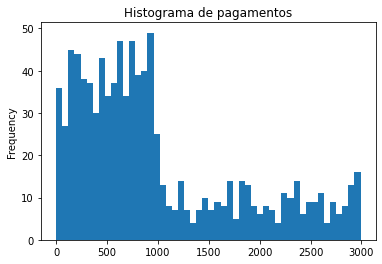

In [4]:
# Analisar a tendência de pagamentos baseada no histograma de valores pagos
df['paid'].plot(kind='hist', bins=50, title='Histograma de pagamentos')

In [ ]:
# Convertendo formato de data para datetime, assim podemos fazer comparações de datas
df['date'] = pd.to_datetime(df['date'], format='%D/%M/%Y', infer_datetime_format=True)

# Pegando todos os pagamentos realizados em 2024
df2024 = df.loc[
    (df['date'] >= '01-01-2024')
    & 
    (df['date'] <= '31-12-2024')
]

# Calculando a média e o desvio padrão dos pagamentos realizados em 2024.
mean2024 = df2024['paid'].mean()
std2024 = df2024['paid'].std()

/home/real/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31-12-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


<AxesSubplot:title={'center':'Pagamentos realizados em 2024'}, xlabel='date'>

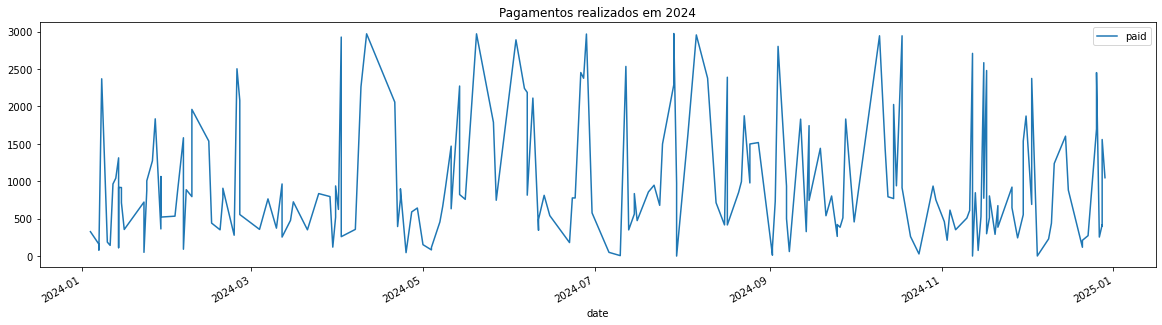

In [ ]:
df2024.plot(x='date', y='paid', kind='line', title='Pagamentos realizados em 2024', figsize=(20, 5))

<AxesSubplot:title={'center':'Pagamentos dentro da variância por gênero'}>

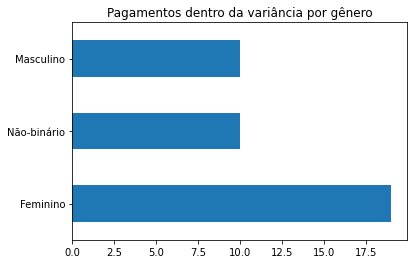

In [ ]:
# Pagamentos que estão fora do padrão
df2024off = df2024.loc[
    df2024['paid'] > mean2024 + std2024
]

# Ordenando os pagamentos fora do padrão porgenero
df2024off['gender'].value_counts().plot(kind='barh', title='Pagamentos dentro da variância por gênero')

In [ ]:
# Simulando a visualização de uma campanha de marketing para mulheres
# e quais delas investiram/pagaram mais nesse período
df2024off.loc[
    (df2024['gender'] == 'Feminino')
    &
    (df2024['date'] >= '2024-06-01')
    &
    (df2024['date'] <= '2024-07-01')
].sort_values(by='date')

# Se fossemos analisar isto baseado nas ultimas informações, poderiamos
# sugerir que, no ano de 2024, as mulheres tiveram um poder de compra maior
# em relação ao resto do público

,name,gender,paid,isFiliated,state,date,plan
id,,,,,,,
175,Vibrant Meitner,Feminino,2890.78,False,PB,2024-06-03,Pro
237,Stupefied Panini,Feminino,2242.01,False,SP,2024-06-06,Pro
109,Blissful Hugle,Feminino,2187.49,False,RR,2024-06-07,Pro
829,Vibrant Bhaskara,Feminino,2377.17,False,RS,2024-06-27,Pro
482,Dreamy Roentgen,Feminino,2968.62,False,BA,2024-06-28,Pro


In [ ]:
woman2024 = df2024.loc[
    (df2024['gender'] == 'Feminino')
]

offWoman2024 = woman2024.loc[
    woman2024['paid'] > mean2024 + std2024
]

meanWoman2024 = offWoman2024['paid'].mean()
meanWoman2024

2504.194210526316

In [ ]:
man2024 = df2024.loc[
    (df2024['gender'] == 'Masculino')
]

offMan2024 = man2024.loc[
    man2024['paid'] > mean2024 + std2024
]

meanMan2024 = offMan2024['paid'].mean()
meanMan2024

2256.159

In [ ]:
nb2024 = df2024.loc[
    (df2024['gender'] == 'Não-binário')
]

offNb2024 = nb2024.loc[
    nb2024['paid'] > mean2024 + std2024
]

meanNb2024 = offNb2024['paid'].mean()
meanNb2024

2354.3289999999997

<AxesSubplot:title={'center':'Poder de compra médio acima da média por gênero em 2024'}>

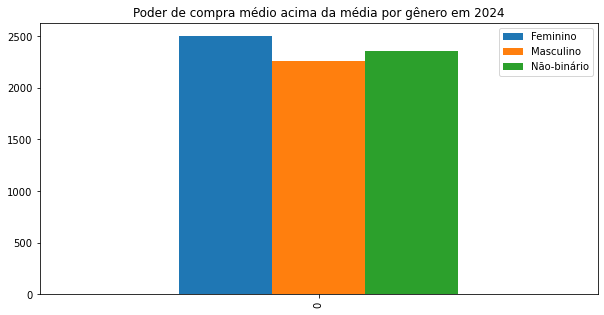

In [ ]:
mean2024All = pd.DataFrame({
    'Feminino': meanWoman2024,
    'Masculino': meanMan2024,
    'Não-binário': meanNb2024
}, index=[0])

mean2024All.plot(kind='bar', title='Poder de compra médio acima da média por gênero em 2024', figsize=(10, 5))
# Com base nesses dados, podemos sugerir que as mulheres tiveram um poder de compra maior em 2024
# Deixando o público 'Não-binário' em segundo lugar e o público 'Masculino' em terceiro

In [ ]:
df2024off.sort_values(by='date', ascending=False)

,name,gender,paid,isFiliated,state,date,plan
id,,,,,,,
62,Festive Bassi,Não-binário,2452.81,False,MS,2024-12-26,Pro
756,Vigorous Chatelet,Masculino,2374.67,False,AM,2024-12-03,Pro
698,Goofy Mendeleev,Não-binário,1872.17,False,RO,2024-12-01,Pro
373,Hopeful Shirley,Masculino,2480.56,True,TO,2024-11-17,Premium
541,Interesting Tereshkova,Feminino,2585.35,False,SP,2024-11-16,Pro
310,Nervous Mirzakhani,Feminino,2709.81,True,RJ,2024-11-12,Premium
362,Beautiful Meitner,Masculino,2944.91,False,PI,2024-10-18,Pro
688,Sad Pike,Feminino,2026.38,True,CE,2024-10-15,Premium
442,Vigilant Leakey,Não-binário,2190.30,False,GO,2024-10-11,Pro


<AxesSubplot:title={'center':'Pagamentos fora do padrão por gênero em 2024'}>

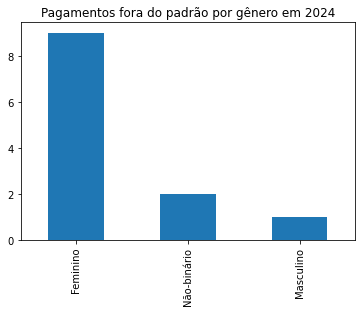

In [ ]:
# Contando quantos pagamentos fora do padrão foram realizados por gênero
byGender2024Off = df2024off['gender'].value_counts()

# Plotando o gráfico de barras
byGender2024Off.plot(kind='bar',title='Pagamentos fora do padrão por gênero em 2024')

<AxesSubplot:>

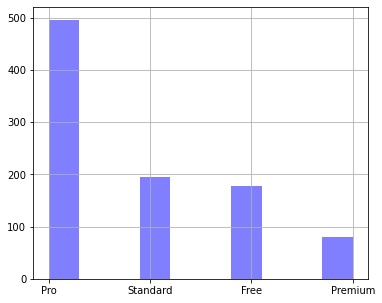

In [ ]:
# Analisar a tendência dos planos baseado no histograma de planos obtidos
df['plan'].hist(figsize=(6, 5), bins=10, color='blue', alpha=0.5)

<AxesSubplot:title={'center':'Estados com mais registros'}, xlabel='Estados', ylabel='Quantidade de registros'>

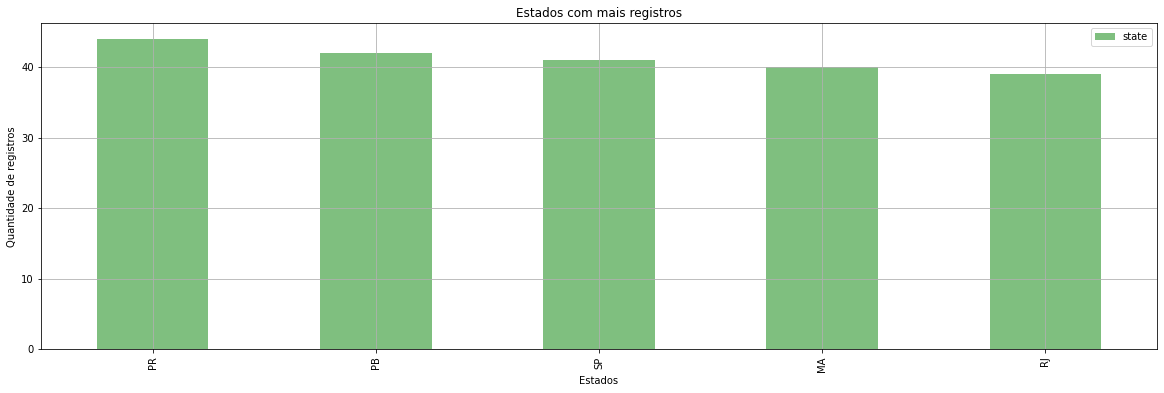

In [ ]:
# Analisar a quantidade de pessoas pagantes por estado em um gráfico de barras
states = df['state'].value_counts().head(5)
state_count = states.value_counts()

# Plotando o gráfico de barras
states.plot(kind='bar', figsize=(20, 6), color='green', alpha=0.5,legend=True, title='Estados com mais registros', ylabel='Quantidade de registros', xlabel='Estados', grid=True)

In [ ]:
# Aqui nós calculamos as medias e desvios padrões dos pagamentos
meanPaid = statistics.mean(df['paid']) # Média
# df['paid'].mean() # Outra forma de calcular a média

deviancePaid = statistics.stdev(df['paid']) # Desvio padrão
# df['paid'].std() # Outra forma de calcular o desvio padrão

In [ ]:
# Aqui vemos a média e o desvio padrão dos pagamentos, mostrando os números
# que estão dentro dos resultados usuais e padrões
meanPaid - deviancePaid, meanPaid + deviancePaid


(179.54922803142927, 1796.8913187614203)

In [ ]:
# Aqui vemos o desvio padrão relacionado a anomalias, mostrando os números
# que estão fora dos resultados usuais e padrões
meanPaid - 2 * deviancePaid, meanPaid + 2 * deviancePaid

(-629.1218173335662, 2605.5623641264156)

In [ ]:
# Aqui descrevemos o dataframe, mostrando a média, desvio padrão, mínimo, máximo
df.describe()

,paid
count,951.000000
mean,988.220273
std,808.671045
min,0.010000
25%,387.040000
50%,746.550000
75%,1439.795000
max,2990.800000


In [ ]:
# Mesmo sendo um público em menor quantidade, os pagamentos realizados por pessoas
# do gênero feminino foram maiores que os pagamentos realizados por pessoas dos outros
# públicos. 

# Se fossemos avaliar,ou o fator de melhoria é a campanha de marketing para o público
# feminino, ou o poder de compra em relação a 2024

df2024['gender'].value_counts()

Não-binário    71
Masculino      71
Feminino       62
Name: gender, dtype: int64

In [ ]:
df['gender'].value_counts()

Não-binário    332
Masculino      326
Feminino       293
Name: gender, dtype: int64

In [ ]:
# Serve para correlacionar valores, como a tabela atual não possui nenhuma
# correlação, ficara aqui para fins de conhecimento
# pd.DataFrame.corr

In [ ]:
# CSV with Null
csv_path_null = 'data_sample.csv'
df_null = pd.read_csv(csv_path_null, index_col='id')

# Aqui vemos a quantidade de valores nulos em porcentagem
df_null.isna().sum() / len(df_null) * 100

name          0.0
gender        0.0
paid          4.9
isFiliated    0.0
state         0.0
date          0.0
dtype: float64